In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
insurance_df = pd.read_csv('insurance_train.csv')
insurance_df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [3]:
insurance_df = pd.get_dummies(insurance_df, columns=['MOSTYPE','MOSHOOFD'], drop_first = True)

In [4]:
y = insurance_df['CARAVAN']
X = insurance_df.drop(['CARAVAN'], axis=1)

In [5]:
#Scale Data
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

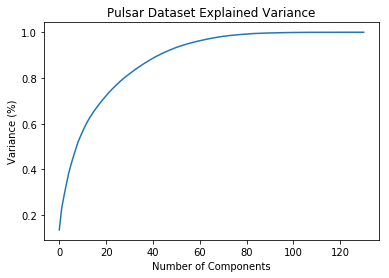

[0.13507682 0.22884596 0.28328288 0.33405033 0.38227281 0.42087198
 0.45557893 0.48820816 0.51923968 0.54375897 0.5669002  0.58836629
 0.60854697 0.62635476 0.64222439 0.65721245 0.67125404 0.68499657
 0.69813031 0.71038799 0.72253587 0.73427378 0.74519984 0.75555432
 0.76573604 0.77547286 0.78510784 0.79395886 0.80263863 0.81064147
 0.81852134 0.82610044 0.83363275 0.84101317 0.84803307 0.85500239
 0.8616096  0.86809188 0.87435508 0.88049708 0.88657086 0.8921496
 0.89740024 0.90260387 0.90752446 0.91220062 0.91676672 0.92122118
 0.92552868 0.92964699 0.93373047 0.93728372 0.94068617 0.94388243
 0.94697077 0.94984359 0.95266225 0.95537938 0.95805164 0.96061626
 0.96296343 0.96523882 0.9674291  0.969575   0.97164498 0.97370121
 0.97555848 0.97738634 0.97911623 0.98072677 0.98212661 0.98348046
 0.98469389 0.98585246 0.98693982 0.98794399 0.98889119 0.98972344
 0.99053333 0.99132252 0.99210456 0.99286172 0.99361189 0.99432239
 0.99476423 0.99516126 0.99553435 0.99590274 0.99624517 0.99656

In [6]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_scaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()
print(np.cumsum(pca.explained_variance_ratio_))

In [7]:
pca = PCA(n_components=40)
X_pca = pca.fit_transform(X_scaled)

In [8]:
X.head()

,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,...,MOSTYPE_41,MOSHOOFD_2,MOSHOOFD_3,MOSHOOFD_4,MOSHOOFD_5,MOSHOOFD_6,MOSHOOFD_7,MOSHOOFD_8,MOSHOOFD_9,MOSHOOFD_10
0,1,3,2,0,5,1,3,7,0,2,...,0,0,0,0,0,0,0,1,0,0
1,1,2,2,1,4,1,4,6,2,2,...,0,0,0,0,0,0,0,1,0,0
2,1,2,2,0,4,2,4,3,2,4,...,0,0,0,0,0,0,0,1,0,0
3,1,3,3,2,3,2,4,5,2,2,...,0,0,1,0,0,0,0,0,0,0
4,1,4,2,1,4,1,4,7,1,2,...,0,0,0,0,0,0,0,0,0,1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=11)

In [10]:
X.describe()

,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,...,MOSTYPE_41,MOSHOOFD_2,MOSHOOFD_3,MOSHOOFD_4,MOSHOOFD_5,MOSHOOFD_6,MOSHOOFD_7,MOSHOOFD_8,MOSHOOFD_9,MOSHOOFD_10
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,1.110615,2.678805,2.991240,0.696496,4.626932,1.069907,3.258502,6.183442,0.883545,2.290450,...,0.035211,0.086225,0.152181,0.008932,0.097733,0.035211,0.094469,0.268464,0.114565,0.047406
std,0.405842,0.789835,0.814589,1.003234,1.715843,1.017503,1.597647,1.909482,0.965924,1.722645,...,0.184329,0.280720,0.359227,0.094092,0.296978,0.184329,0.292506,0.443199,0.318524,0.212525
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,0.000000,4.000000,0.000000,2.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,3.000000,0.000000,5.000000,1.000000,3.000000,6.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,3.000000,1.000000,6.000000,2.000000,4.000000,7.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,10.000000,5.000000,6.000000,9.000000,9.000000,5.000000,9.000000,9.000000,7.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
y.value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

In [12]:
348/(348+5474)

0.05977327378907592

In [13]:
y_train.value_counts()

0    3841
1     234
Name: CARAVAN, dtype: int64

In [14]:
y_test.value_counts()

0    1633
1     114
Name: CARAVAN, dtype: int64

In [15]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

# RandomOverSampler
  # With over-sampling methods, the number of samples in a class
  # should be greater or equal to the original number of samples.
sampler = RandomOverSampler(random_state=11)
X_rs, y_rs = sampler.fit_sample(X_train, y_train)
"""
# SMOTE
sampler = SMOTE(random_state=11)
X_rs, y_rs = sampler.fit_sample(X_train, y_train)

# ADASYN
sampler = ADASYN(random_state=11)
X_rs, y_rs = sampler.fit_sample(X_train, y_train)
"""

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\zacha\AppData\Local\Continuum\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


'\n# SMOTE\nsampler = SMOTE(random_state=11)\nX_rs, y_rs = sampler.fit_sample(X_train, y_train)\n\n# ADASYN\nsampler = ADASYN(random_state=11)\nX_rs, y_rs = sampler.fit_sample(X_train, y_train)\n'

In [16]:
y_rs.value_counts()

1    3841
0    3841
Name: CARAVAN, dtype: int64

In [17]:
X_train, y_train = X_rs, y_rs

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)
test_predictions1 = clf1.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix


def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        print(cm)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

[[1591   42]
 [ 107    7]]


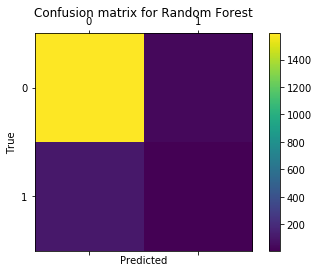

In [20]:
class_names = np.unique(np.array(y_test))
confusion_matrices = [
    #( "Support Vector Machines", confusion_matrix(y,run_cv(X,y,SVC)) ),
    ( "Random Forest", confusion_matrix(y_test, test_predictions1)),
    #( "K-Nearest-Neighbors", confusion_matrix(y,run_cv(X,y,KNN)) ),
    #( "Gradient Boosting Classifier", confusion_matrix(y,run_cv(X,y,GBC)) ),
    #( "Logisitic Regression", confusion_matrix(y,run_cv(X,y,LR)) )
]
draw_confusion_matrices(confusion_matrices,class_names)

Feature ranking:
1. MAANTHUI (0.084834)
2. MGEMOMV (0.052695)
3. MGEMLEEF (0.041220)
4. MGODRK (0.026880)
5. MGODPR (0.025262)
6. MGODOV (0.024632)
7. MGODGE (0.023622)
8. MRELGE (0.023375)
9. MRELSA (0.021608)
10. MRELOV (0.020322)


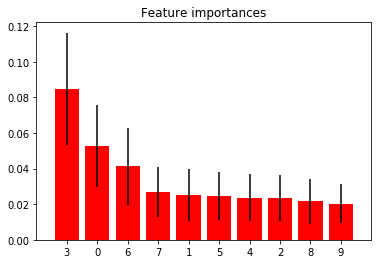

In [21]:
importances = clf1.feature_importances_[:10]
std = np.std([tree.feature_importances_ for tree in clf1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

features = X.columns

for f in range(10):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
#import pylab as pl
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()

In [22]:
from sklearn.metrics import accuracy_score, log_loss, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score


classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "F-score", "Log Loss", "Recall"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    test_predictions = clf.predict(X_test)
    acc = f1_score(y_test, test_predictions)
    print("F-score: {:.4%}".format(acc))
    
    rc = recall_score(y_test, test_predictions)
    print("Recall: {}".format(rc))
    
    test_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, test_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll, rc]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
F-score: 13.7255%
Recall: 0.18421052631578946
Log Loss: 3.6284270957206295
DecisionTreeClassifier
****Results****
F-score: 13.4529%
Recall: 0.13157894736842105
Log Loss: 3.5067396405914883
RandomForestClassifier
****Results****
F-score: 7.3620%
Recall: 0.05263157894736842
Log Loss: 0.4881436651859542
AdaBoostClassifier
****Results****
F-score: 19.6721%
Recall: 0.47368421052631576
Log Loss: 0.6656800532732566
GradientBoostingClassifier
****Results****
F-score: 21.5962%
Recall: 0.40350877192982454
Log Loss: 0.4272946599446096
GaussianNB
****Results****
F-score: 17.3797%
Recall: 0.5701754385964912
Log Loss: 0.7701693999172096
LinearDiscriminantAnalysis
****Results****
F-score: 21.4182%
Recall: 0.6491228070175439
Log Loss: 0.59156982228752
QuadraticDiscriminantAnalysis
****Results****
F-score: 15.7951%
Recall: 0.6491228070175439
Log Loss: 2.4405927077016876


**F-Score & Log Loss Visualization**

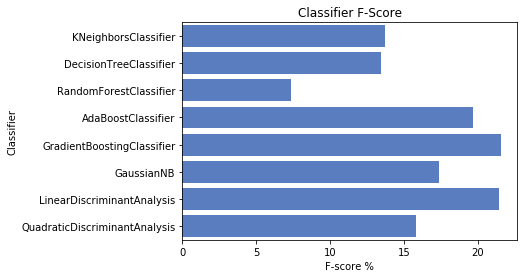

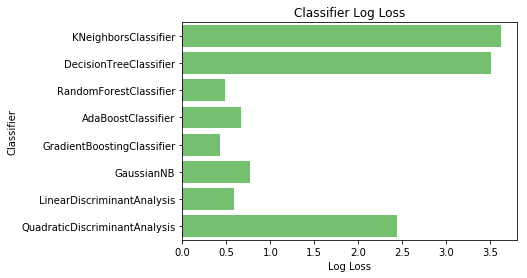

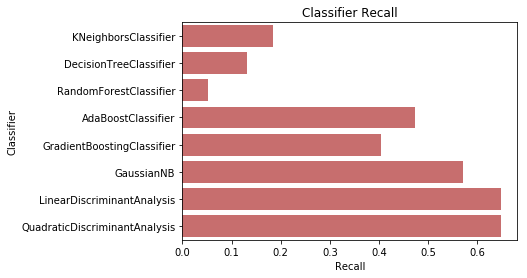

In [23]:
sns.set_color_codes("muted")
sns.barplot(x='F-score', y='Classifier', data=log, color="b")

plt.xlabel('F-score %')
plt.title('Classifier F-Score')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Recall', y='Classifier', data=log, color="r")

plt.xlabel('Recall')
plt.title('Classifier Recall')
plt.show()



# LDA Analysis

In [35]:
from sklearn.metrics import classification_report
clf1 = LinearDiscriminantAnalysis()
clf1.fit(X_train, y_train)
test_predictions1 = clf1.predict(X_test)
report = classification_report(y_test, test_predictions1)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.69      0.81      1633
           1       0.13      0.65      0.21       114

    accuracy                           0.69      1747
   macro avg       0.55      0.67      0.51      1747
weighted avg       0.91      0.69      0.77      1747



In [36]:
print(confusion_matrix(y_test, test_predictions1))

[[1130  503]
 [  40   74]]


In [37]:
from sklearn.metrics import roc_auc_score, accuracy_score
print(roc_auc_score(y_test, test_predictions1))
print(accuracy_score(y_test, test_predictions1))

0.6705503808510866
0.6891814539210075


C:\Users\zacha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\zacha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


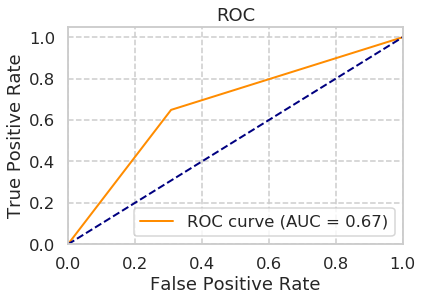

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1.0, font='Ricty',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})


fpr, tpr, _ = roc_curve(y_test, test_predictions1)
roc_auc = auc(fpr, tpr)

lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# QDA ANALYSIS

In [28]:
from sklearn.metrics import classification_report
clf1 = QuadraticDiscriminantAnalysis()
clf1.fit(X_train, y_train)
test_predictions1 = clf1.predict(X_test)
report = classification_report(y_test, test_predictions1)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.54      0.69      1633
           1       0.09      0.65      0.16       114

    accuracy                           0.55      1747
   macro avg       0.52      0.60      0.42      1747
weighted avg       0.90      0.55      0.66      1747



In [29]:
print(confusion_matrix(y_test, test_predictions1))

[[884 749]
 [ 40  74]]


In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, test_predictions1)

0.5952288866686004

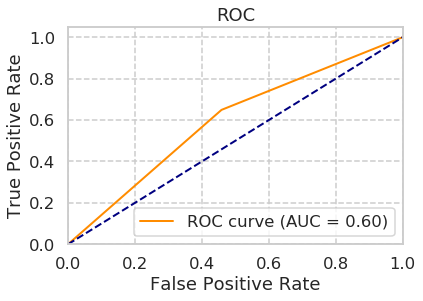

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1.0, font='Ricty',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})


fpr, tpr, _ = roc_curve(y_test, test_predictions1)
roc_auc = auc(fpr, tpr)

lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [32]:
y.value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

In [33]:
348/(5474+358)

0.059670781893004114